In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import linregress
import scipy.stats as st

In [2]:
temp = pd.read_csv("C:/Users/pc/Downloads/average_temp_2000_2020.txt")
temp.head(20)

,Year,Average_Temp
0,2000,53.27
1,2001,53.69
2,2002,53.21
3,2003,53.26
4,2004,53.10
5,2005,53.64
6,2006,54.25
7,2007,53.65
8,2008,52.29
9,2009,52.39


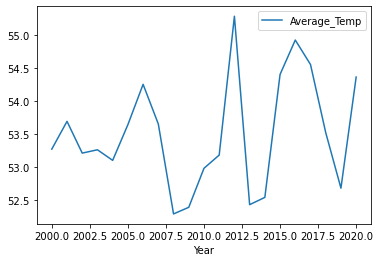

In [3]:
lines = temp.plot.line(x="Year", y="Average_Temp")

In [4]:
df = pd.read_csv("C:/Users/pc/Downloads/drought_data.csv")
df.head(20)

,MapDate,AreaOfInterest,None,D4,Year
0,20201229,CONUS,33.59,9.89,2020
1,20201222,CONUS,32.98,9.89,2020
2,20201215,CONUS,33.03,9.89,2020
3,20201208,CONUS,32.60,9.90,2020
4,20201201,CONUS,33.15,9.87,2020
5,20201124,CONUS,32.59,8.52,2020
6,20201117,CONUS,35.37,5.65,2020
7,20201110,CONUS,35.55,4.06,2020
8,20201103,CONUS,37.63,2.85,2020
9,20201027,CONUS,35.58,2.82,2020


In [5]:
df_group=df.groupby(["Year"])

In [6]:
df_group.mean()

,MapDate,None,D4
Year,,,
2000,2.000066e+07,50.503846,0.777885
2001,2.001066e+07,55.387500,0.195577
2002,2.002067e+07,37.202075,2.118868
2003,2.003068e+07,41.161346,1.823462
2004,2.004067e+07,52.420192,1.423654
2005,2.005067e+07,56.354038,0.407115
2006,2.006118e+07,48.933273,0.871091
2007,2.007069e+07,46.073878,1.431837
2008,2.008067e+07,51.862642,0.658113


In [7]:
d4 = df_group.mean()

d4 = d4["D4"]
d4

Year
2000    0.777885
2001    0.195577
2002    2.118868
2003    1.823462
2004    1.423654
2005    0.407115
2006    0.871091
2007    1.431837
2008    0.658113
2009    0.676346
2010    0.000000
2011    6.102308
2012    3.588846
2013    3.194906
2014    2.929423
2015    3.038654
2016    1.601346
2017    0.216346
2018    1.243077
2019    0.076604
2020    1.597500
Name: D4, dtype: float64

In [ ]:
year = temp["Year"]
year

In [ ]:
temp = temp["Average_Temp"]
temp

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(df.Year, df.Average_Temp, color="red", marker="o")

# set x-axis label
ax.set_xlabel("Year",fontsize=14)

# set y-axis label
ax.set_ylabel("Average_Temp",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df.Year, df.D4, color="blue",marker="o")
ax2.set_ylabel("Drought",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

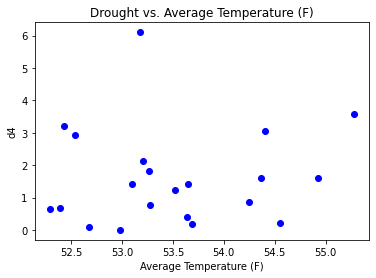

In [12]:
# Create x and y axis for scatter chart
x_axis = temp["Average_Temp"]
y_axis = d4

# Create scatter chart to display number of tropical storms against average temp.
plt.scatter(x_axis, y_axis, color='b')
plt.title("Drought vs. Average Temperature (F)")
plt.xlabel("Average Temperature (F)")
plt.ylabel("d4")
plt.show()

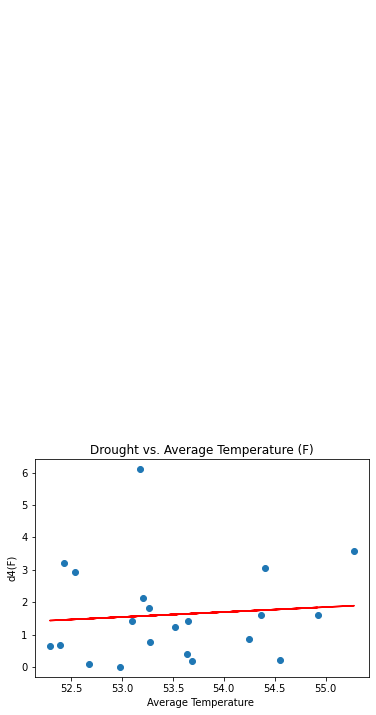

The r^2 value is 0.00778424569360928


In [18]:
# Plot the regression line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (53,20), fontsize=15, color="red")

plt.title("Drought vs. Average Temperature (F)")
plt.xlabel("Average Temperature ")
plt.ylabel("d4(F)")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

